# Manual de Prova Final de Ciência dos Dados

## Informações Gerais:

    1) As funções não estão em uma ordem correta, pode precisar usar umas das ultimas antes
    2) No final de tudo tem alguns conceitos e imagens ilustrativas e os links de onde foram retirados
    3) SHIFT TAB mostra os parâmetros e comentários das funções
    4) Acima de algumas funções tem explicações de como usar 
    5) Fique a vontade em melhorar este arquivo e dar pull request em github.com/4rfel/defs_dados
    6) Escrevi e sai correndo, pau no cu de quem ta lendo
    7) Não apagar o item 6
    


In [ ]:
### ------------------ Imports usados nas fuções desse Arquivo ---------------###

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split # separa base de dado em treinamento e teste

### -------------------- Outros Imports uteis  --------------------------------###

from sklearn.linear_model import LinearRegression # regressão linear do scykit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score # validação 

import seaborn as sns
from scipy.stats import norm, probplot
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

## Regressão Linear

In [ ]:
'''
Usar quando quer prever uma variavel(y_pred) a partir de uma ou mais variaveis (regressão linear simples ou multipla)

Exemplo: 

model = regress(X_train,y_train)
model.summary() 
y_pred = getPredict(model,x_test) #função desse arquivo


'''
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [1]:
'''
Split treinamento e teste para fazer modelos de predição

se quiser usar sem a função:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
ou
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

exemplo de X e Y:
y = dados['Release Clause']
x = dados[['Overall','International Reputation','Potential']]
'''
# import necessario
from sklearn.model_selection import train_test_split # separa base de dado em treinamento e teste

def TrainTest(X,Y, sizeTest=.3):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=sizeTest)
    return x_train,x_test,y_train,y_test

In [ ]:
def bestNvariables(df, listX, y,n=2):
    '''
    Escolhe as n melhores variaveis para prever uma variavel dependente de forma
    linear e retorna uma regressão linear.
    
    df --> DataFrame
    listX --> Lista de variaveis independentes
    y --> Variavel dependente/a ser analizada 
    n --> quantidade final das variaveis, 2 como padrão
    '''
    y = df[[y]]
    xs = df[listX]
    results = regress(xs, y)
    
    while len(results.pvalues) > n+1:
        actual_max = 0
        for e in list(round(results.pvalues,10)):
            if e > actual_max:
                actual_max = e
        j = 0
        for e in list(round(results.pvalues,10)):
            j += 1
            if e == actual_max:
                break
        listX.remove(listX[j-2])
        xs = df[listX]
        results = regress(xs, y)
    return results

In [ ]:
'''
Tem que copiar a função regress tbm 
'''

def variablesLessAlpha(df, listX, y, alpha=0.05):
    '''
    Exclui todas as variaveis em que o P>|t| for maior que o alpha e retorna uma regressão linear
    
    df --> DataFrame de treino
    listX --> Lista de variaveis independentes
    y --> Variavel dependente/a ser analizada 
    alpha --> nivel de significancia, 5% como padrão'''
    
    y = df[[y]]
    xs = df[listX]
    results = regress(xs, y)

    while actual_max > alpha:
        actual_max = max(results.pvalues)
        j = 0
        if actual_max > alpha:
            for e in list(results.pvalues):
                j += 1
                if e == actual_max:
                    break
            listX.remove(listX[j-2])
            xs = df[listX]
            results = regress(xs, y)
            
    return results

In [ ]:
'''
Tem que copiar a função regress tbm 
'''

def variablesLessAlphaSemDataframe(Y_train, X_train, alpha=0.05):
    '''
    Exclui todas as variaveis em que o P>|t| for maior que o alpha e retorna uma regressão linear
    
    df --> DataFrame de treino
    listX --> Lista de variaveis independentes
    y --> Variavel dependente/a ser analizada 
    alpha --> nivel de significancia, 5% como padrão'''
    
    y = Y_train
    xs = X_train
    results = regress(xs, y)

    while actual_max > alpha:
        actual_max = max(results.pvalues)
        j = 0
        if actual_max > alpha:
            for e in list(results.pvalues):
                j += 1
                if e == actual_max:
                    break
            listX.remove(listX[j-2])
            xs = df[listX]
            results = regress(xs, y)
            
    return results

In [ ]:
'''
Escreve a equação da reta da regressão linear

Y = A + B * x + C * x2 + D * x3

'''

def retornaEqRegrLinear(results, y="y", r=10):
    '''
    results = resultado da predição 
    '''
    eq = y+" = "
    for var, coef in zip(list(results.conf_int().index), list(round(results.params, r))):
        eq += str(coef) + "*" + str(var)
        eq += " + "
    eq = eq[:-3]
    eq = eq.replace("*const", "")
    return eq

In [ ]:
def getPrediction(result, listX):
    '''
    Retorna a predição usando os valores que vc passou
    '''
    return result.predict(sm.add_constant(listX))

In [ ]:
def rms(y, y_pred):
    '''
    Retorna o RMS
    
    y --> valores reais
    y_pred --> valores preditos
    '''
    return (sum((y-y_pred)**2)*1/len(y))**0.5

## Regressão Decision Tree
Uma árvore de decisão é um modelo de machine learning supervisionada, usado para prever um destino, aprendendo regras de decisão a partir de recursos. Como o nome sugere, podemos pensar nesse modelo como quebrar nossos dados, tomando uma decisão com base em fazer uma série de perguntas. O modelo de árvore de decisão aprende uma série de perguntas para inferir os rótulos de classe das amostras.

In [ ]:
'''
Arvore = DecisionTreeRegressor(random_state = 1)
Arvore.fit(X_treinamento, Y_treinamento)
plt.scatter(Y_teste, Arvore.predict(X_teste), color = 'blue')
plt.show()
'''

## Regressão Random Forest
O metodo de regrassao 'Random Forest', se utiliza dos mesmo recursos do 'Decision Tree Regressor', gerando varias arvores de decisao e combinando os resultados, produz geralmente um resultado mais satisfatorio que a decision tree.

In [ ]:
'''
RandomF = RandomForestRegressor(random_state=0)
RandomF.fit(X_treinamento, Y_treinamento)
plt.scatter(Y_teste, RandomF.predict(X_teste), color = 'blue')
plt.show()
'''

## Classificador Random Forest

In [ ]:
'''
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc.fit(X_train, y_train)
'''

### Bootstrap:

Utiliazado quando queremos fazer o teste de hipotese, porem o exercicio não fala qual a média esperada e o desvio padrão e a amostra tem um n baixo demais para Teorema do Limite central (TLC)


In [ ]:
# Aula 22
def Bootstrap_media(listX, dobs, quant_permut=10000, alpha=0.05, bicaudal=True, grid=False, legend=True, dobs_legend="Media observada", critico_legend="Xcritico", density=True):
    '''
    Aplica bootstrap em listX e plota o histograma da distribuição das medias
    
    listX --> lista a ser analizada
    dobs --> media experimental
    quant_permut --> quantidade de permutaçoes a serem realizadas, padrão:10000
    alpha --> nivel de significancia de 0 a 1, padrão:0.05
    bicaudal --> se é bicaudal ou unicaudal, padrão:True
    grid --> se coloca grid, padrão:False
    legend --> se coloca legenda, padrão:True
    dobs_legend --> legenda do dobs. padrão:Media esperada
    critico_legend --> legenda do xcritico. padrão:Xcritico
    density --> se a area do histograma é 1. padrão:True
    '''
    alpha *= 100
    
    n = len(listX)
    x_mean = []
    for e in range(quant_permut):
        reamostra_x = np.random.choice(listX, size=n, replace=True)
        x_mean.append(np.mean(reamostra_x))
    if bicaudal:
        plt.hist(x_mean, bins=20, density=density)
        plt.axvline(dobs, color='lawngreen', label=dobs_legend)
        plt.axvline(np.percentile(x_mean, 100-alpha/2), color='red', label=critico_legend)
        plt.axvline(np.percentile(x_mean, alpha/2), color='red')
    else:
        plt.hist(x_var, bins=50, density=density)
        plt.axvline(dobs, color='lawngreen')
        plt.axvline(np.percentile(x_var, 100-alpha/2), color='red')
        
    if legend:
        plt.legend()
    plt.grid(grid)
    plt.show()

In [ ]:
def Bootstrap_var(listX, dobs, quant_permut=10000, alpha=0.05, bicaudal=True, grid=False, legend=True, dobs_legend="Variancia esperada", critico_legend="Xcritico", density=True):
    '''
    Aplica bootstrap em listX e plota o histograma da distribuição das variancias
    
    listX --> lista a ser analizada
    dobs --> media experimental
    quant_permut --> quantidade de permutaçoes a serem realizadas, padrão:10000
    alpha --> nivel de significancia de 0 a 1, padrão:0.05
    bicaudal --> se é bicaudal ou unicaudal, padrão:True
    grid --> se coloca grid, padrão:False
    legend --> se coloca legenda, padrão:True
    dobs_legend --> legenda do dobs. padrão: Variancia esperada
    critico_legend --> legenda do xcritico. padrão: Xcritico
    
    '''
    n = len(listX)
    alpha *= 100
    x_var = []
    for e in range(quant_permut):
        reamostra_x = np.random.choice(listX, size=n, replace=True)
        x_var.append(np.var(reamostra_x))
    if bicaudal:
        plt.hist(x_var, bins=50, density=density)
        plt.axvline(dobs, color='lawngreen', label=dobs_legend)
        plt.axvline(np.percentile(x_var, 100-alpha/2), color='red', label=critico_legend)
        plt.axvline(np.percentile(x_var, alpha/2), color='red')
    else:
        plt.hist(x_var, bins=50, density=density)
        plt.axvline(dobs, color='lawngreen')
        plt.axvline(np.percentile(x_var, 100-alpha/2), color='red')
    if legend:
        plt.legend()
    plt.gride(grid)
    plt.show()
    

In [ ]:
def Bootstrap_mediana(listX, dobs, quant_permut=10000, alpha=0.05, bicaudal=True, grid=False, legend=True, dobs_legend="Variancia esperada", critico_legend="Xcritico", density=True):
    '''
    Aplica bootstrap em listX e plota o histograma da distribuição das medianas
    
    listX --> lista a ser analizada
    dobs --> media experimental
    quant_permut --> quantidade de permutaçoes a serem realizadas, padrão:10000
    alpha --> nivel de significancia de 0 a 1, padrão:0.05
    bicaudal --> se é bicaudal ou unicaudal, padrão:True
    grid --> se coloca grid, padrão:False
    legend --> se coloca legenda, padrão:True
    dobs_legend --> legenda do dobs. padrão: Variancia esperada
    critico_legend --> legenda do xcritico. padrão: Xcritico
    
    '''
    n = len(listX)
    alpha *= 100
    x_median = []
    for e in range(quant_permut):
        reamostra_x = np.random.choice(listX, size=n, replace=True)
        x_median.append(np.median(reamostra_x))
    if bicaudal:
        plt.hist(x_median, bins=50, density=density)
        plt.axvline(dobs, color='lawngreen', label=dobs_legend)
        plt.axvline(np.percentile(x_median, 100-alpha/2), color='red', label=critico_legend)
        plt.axvline(np.percentile(x_median, alpha/2), color='red')
    else:
        plt.hist(x_median, bins=50, density=density)
        plt.axvline(dobs, color='lawngreen')
        plt.axvline(np.percentile(x_median, 100-alpha/2), color='red')
    if legend:
        plt.legend()
    plt.gride(grid)
    plt.show()
    

In [ ]:
def BootstrapEDITAR(listX, dobs, quant_permut=10000, alpha=0.05, bicaudal=True, grid=False, legend=True, dobs_legend="Dobs esperado", critico_legend="Xcritico", density=True):
    '''
    EDITE O CODIGO PARA COLOCAR A FUNÇÂO QUE VC QUISER OU CHAMA A SUA DEF DE "suaDef"
    PRA TROCAR É NO for
    
    Aplica bootstrap em listX e plota o histograma da distribuição do que vc quiser
    
    listX --> lista a ser analizada
    dobs --> media experimental
    quant_permut --> quantidade de permutaçoes a serem realizadas, padrão:10000
    alpha --> nivel de significancia de 0 a 1, padrão:0.05
    bicaudal --> se é bicaudal ou unicaudal, padrão:True
    grid --> se coloca grid, padrão:False
    legend --> se coloca legenda, padrão:True
    dobs_legend --> legenda do dobs. padrão: Dobs esperado
    critico_legend --> legenda do xcritico. padrão: Xcritico
    density --> se a area do histograma é 1, padrão:True
    '''
    n = len(listX)
    x = []
    alpha *= 100
    
    for e in range(quant_permut):
        reamostra_x = np.random.choice(listX, size=n, replace=True)
        
        # --------------- se quiser trocar pra def q mandaram usar  -------------------------------- 
        x.append(suaDef(reamostra_x)) 
        # --------------- tu troca na linha de cima cabaço
    if bicaudal:
        plt.hist(x, bins=50, density=density);
        plt.axvline(dobs, color='lawngreen', label=dobs_legend)
        plt.axvline(np.percentile(x, 100-alpha/2), color='red', label=critico_legend)
        plt.axvline(np.percentile(x, alpha/2), color='red')
    else:
        plt.hist(x, bins=50, density=density);
        plt.axvline(dobs, color='lawngreen')
        plt.axvline(np.percentile(x, 100-alpha/2), color='red')
    if legend:
        plt.legend()
    plt.grid(grid)
    plt.show()

## Teste de Permutação

In [ ]:
def AmostraIndependenteMedia(xA, xB, alpha=0.05, n=10000, grid=False, legend=True, dobs_legend="Delta Media Inicial", critico_legend="Xcritico", bins=20, density=True, pvalue=True, c='both'):
    '''
    Plota um histograma do delta das médias com os Xcriticos e o delta das medias originais
    
    xA --> lista 1
    xB --> lista 2
    alpha --> nivel de significancia de 0 a 1, padrao 0.05
    n --> quantiade de repetiçoes, padrão:10000
    grid --> se coloca grid, padrão:False
    legend --> se coloca legenda, padrão:True
    dobs_legend --> legenda do dobs, padrão:Delta Media Inicial
    critico_legend --> legenda dos Xcritico, padrão:Xcritico
    bins --> quantidade de bins no histograma, padrão:20
    density --> se a area do histograma é 1, padrão:True
    pvalue --> se retorna pvalue(True) ou os Xcriticos e o dobs(False), padrão:True
    '''
    alpha *= 100
    xAB = xA + xB
    deltaMean = []
    if c == "right" or c == "both":
        dobs = abs(np.mean(xB)-np.mean(xA))
    else:
        dobs = -abs(np.mean(xB)-np.mean(xA))
    for e in range(n):
        np.random.shuffle(xAB)
        shuffleA = xAB[0:len(xA)+1]
        shuffleB = xAB[len(xA)+1: ]
        
        meanShuffleA = np.mean(shuffleA)
        meanShuffleB = np.mean(shuffleB)
        
        deltaMean.append(meanShuffleB-meanShuffleA)
        
    if c == "both":
        XC1 = np.percentile(deltaMean, alpha/2)
        XC2 = np.percentile(deltaMean, 100-alpha/2)
        plt.axvline(dobs, color='lawngreen', label=dobs_legend)
        plt.axvline(-dobs, color='lawngreen', label='menos '+dobs_legend)
        plt.axvline(XC1, color='red', label=critico_legend)
        plt.axvline(XC2, color='red')
    elif c == "right":
        XC = np.percentile(deltaMean, 100-alpha)
        plt.axvline(dobs, color='lawngreen', label=dobs_legend) 
        plt.axvline(XC, color='red', label=critico_legend)
    else:
        XC = np.percentile(deltaMean, alpha)
        plt.axvline(dobs, color='lawngreen', label=dobs_legend)   
        plt.axvline(XC, color='red', label=critico_legend)

    plt.hist(deltaMean, bins=bins, density=density);

    if legend:
        plt.legend()
    plt.grid(grid)
    plt.show()
    
    if pvalue:
        deltaMean = pd.Series(deltaMean)
        if c == "both":
            p_value = len(deltaMean[deltaMean > dobs])/len(deltaMean) + len(deltaMean[deltaMean < -dobs])/len(deltaMean)
        elif c == "right":
            p_value = len(deltaMean[deltaMean > dobs])/len(deltaMean)
        else:
            p_value = len(deltaMean[deltaMean < dobs])/len(deltaMean)
        return p_value
    if not pvalue:
        if c == "both":
            return XC1, XC2, dobs
        return XC, dobs

In [ ]:
def AmostraIndependenteVar(xA, xB, alpha=0.05, n=10000, grid=False, legend=True, dobs_legend="Delta Media Inicial", critico_legend="Xcritico", bins=20, density=True, pvalue=True, c='both'):
    '''
    Plota um histograma do delta das vâriancias com os Xcriticos e o delta das vâriancias originais
    
    xA --> lista 1
    xB --> lista 2
    alpha --> nivel de significancia de 0 a 1, padrao 0.05
    n --> quantiade de repetiçoes, padrão:10000
    grid --> se coloca grid, padrão:False
    legend --> se coloca legenda, padrão:True
    dobs_legend --> legenda do dobs, padrão:Delta Media Inicial
    critico_legend --> legenda dos Xcritico, padrão:Xcritico
    bins --> quantidade de bins no histograma, padrão:20
    density --> se a area do histograma é 1, padrão:True
    pvalue --> se retorna o pvalue(True) ou os Xcriticos e o dobs(False), padrão:True
    '''
    alpha *= 100
    xAB = xA + xB
    deltaVar = []
    
    dobs = np.var(xB)-np.var(xA)

    for e in range(n):
        np.random.shuffle(xAB)

        shuffleA = xAB[0:len(xA)+1]
        shuffleB = xAB[len(xA)+1:]

        meanShuffleA = np.var(shuffleA)
        meanShuffleB = np.var(shuffleB)

        deltaVar.append(meanShuffleB-meanShuffleA)
    
    if c == "both":
        XC1 = np.percentile(deltaMean, alpha/2)
        XC2 = np.percentile(deltaMean, 100-alpha/2)
        plt.axvline(dobs, color='lawngreen', label=dobs_legend)
        plt.axvline(-dobs, color='lawngreen', label='menos '+dobs_legend)
        plt.axvline(XC1, color='red', label=critico_legend)
        plt.axvline(XC2, color='red')
    elif c == "right":
        XC = np.percentile(deltaMean, 100-alpha)
        plt.axvline(dobs, color='lawngreen', label=dobs_legend) 
        plt.axvline(XC, color='red', label=critico_legend)
    else:
        XC = np.percentile(deltaMean, alpha)
        plt.axvline(dobs, color='lawngreen', label=dobs_legend)   
        plt.axvline(XC, color='red', label=critico_legend)
    
    if legend:
        plt.legend()
    plt.grid(grid)
    plt.show()
    
    if pvalue:
        deltaMean = pd.Series(deltaMean)
        if c == "both":
            p_value = len(deltaMean[deltaMean > dobs])/len(deltaMean) + len(deltaMean[deltaMean < -dobs])/len(deltaMean)
        elif c == "right":
            p_value = len(deltaMean[deltaMean > dobs])/len(deltaMean)
        else:
            p_value = len(deltaMean[deltaMean < dobs])/len(deltaMean)
        return p_value
    if not pvalue:
        if c == "both":
            return XC1, XC2, dobs
        return XC, dobs

In [ ]:
def AmostraDependenteCorr(x, y, alpha=0.05, n=10000, grid=False, legend=True, robs_legend="Corr esperada", critico_legend="Xcritico", bins=20, density=True, c='both'):
    '''
    Plota um histograma da correlação com os Xcriticos e a correlação original
    
    xA --> lista 1
    xB --> lista 2
    alpha --> nivel de significancia de 0 a 1, padrao 0.05
    n --> quantiade de repetiçoes, padrão:10000
    grid --> se coloca grid, padrão:False
    legend --> se coloca legenda, padrão:True
    dobs_legend --> legenda do dobs, padrão:Corr Inicial
    critico_legend --> legenda dos Xcritico, padrão:Xcritico
    bins --> quantidade de bins no histograma, padrão:20
    density --> se a area do histograma é 1, padrão:True
    '''
    alpha *= 100
    
    corrList = []
    
    robs = np.corrcoef(x,y)[0,1]

    for e in range(n):
        np.random.shuffle(y)
        corr = np.corrcoef(x,y)[0,1]
        corrList.append(corr)
    
    if c == "both":
        XC1 = np.percentile(deltaMean, alpha/2)
        XC2 = np.percentile(deltaMean, 100-alpha/2)
        plt.axvline(dobs, color='lawngreen', label=dobs_legend)
        plt.axvline(-dobs, color='lawngreen', label='menos '+dobs_legend)
        plt.axvline(XC1, color='red', label=critico_legend)
        plt.axvline(XC2, color='red')
    elif c == "right":
        XC = np.percentile(deltaMean, 100-alpha)
        plt.axvline(dobs, color='lawngreen', label=dobs_legend) 
        plt.axvline(XC, color='red', label=critico_legend)
    else:
        XC = np.percentile(deltaMean, alpha)
        plt.axvline(dobs, color='lawngreen', label=dobs_legend)   
        plt.axvline(XC, color='red', label=critico_legend)
    
    if legend:
        plt.legend()
    plt.grid(grid)
    plt.show()
    
    return XC1, XC2, robs



# Combinação de variaveis

In [ ]:
def combUniformExpo(unifx1=0, unifx2=10, scale_exp=1, n=5000, x0=-1, x1=15, bins=20):
    '''
    unifx1 --> x0 da uniforme, padrão:0
    unifx2 --> x1 da uniforme, padrão:1
    
    scale_exp --> scale da curva exponencial
    
    n --> quantidade de pontos das curvas
    x0 --> Mínimo do gráfico, padrão:-1
    x1 --> Maximo do gráfico, padrão:15
    bins --> quantidade de bins do histograma, padrão:20
    '''
    eixo_x = np.linspace(x0, x1, n)
    
    scale_unif = (unifx2-unifx1)
    loc_unif = unifx1 + (unifx2-unifx1)/2
    print(loc_unif)

    pdf_unif = stats.uniform.pdf(eixo_x, scale=scale_unif)
    
    pdf_exp = stats.expon.pdf(eixo_x, scale=scale_exp)
    
    x_ = stats.uniform.rvs(loc=loc_unif, scale=scale_unif, size=n)
    y_ = stats.expon.rvs(scale=scale_exp, size=n)
    z_ = x_ + y_
        
    plt.hist(z_, label="z", bins=bins, density=True)
    plt.plot(eixo_x, pdf_unif, label="uniforme")
    plt.plot(eixo_x, pdf_exp, label="exponencial")
    plt.legend(loc='upper right');

## Teste de hipotese


In [ ]:
# Aula 20
def testeHipotese(amostra, H0, alpha=0.05, c='both', sigma=1, x0=-1, x1=1, n_points=1000, pvalue=False, plot=True):
    '''
    amostra --> lista dos dados
    h0 --> hipótese nula
    alpha --> nível de significância de 0 a 1, padrão:0.05
    x0 --> Mínimo do gráfico da normal, padrão:-1
    x1 --> Maximo do gráfico da normal, padrão:1
    c --> cauda, padrão:both
    sigma --> scale, padrão:1
    n_points --> quant de pontos pra curva, padrão:1000
    pvalue --> se retorna os valores P(True) ou os X criticos(False), padrão:False
    plot --> se plota o gráfico, apenas possivel quando pvalue é False, padrão:True
    '''
    if c != "both" and c != "right" and c != "left":
        return None
    
    scale = sigma
    
    if pvalue:
        if c == "left":
            valor_p = stats.norm.cdf(x_obs, loc=H0, scale=scale)

        if c == "right":
            valor_p = 1-stats.norm.cdf(x_obs, loc=H0, scale=scale)
            
        if c == 'both':
            if x_obs < H0:
                valor_p = stats.norm.cdf(x_obs, loc=H0, scale=scale)*2
            else:
                valor_p = (1-stats.norm.cdf(x_obs, loc=H0, scale=scale))*2
                
        return valor_p
    
    else:
        if c == "left":
            XC = stats.norm.ppf(alpha, loc=H0, scale=scale)

        if c == "right":
            XC = stats.norm.ppf(1-alpha, loc=H0, scale=scale)
            
        if plot and c!="both":
            listX = np.linspace(x0,x1,n_points)
            listY = [stats.norm.pdf(x, loc=H0, scale=scale) for x in listX]
            plt.plot(listX, listY)
            plt.axvline(XC, color="red", label="X critico")
            plt.axvline(x_obs, color="lawngreen", label="X obs")
            plt.legend()
            plt.show()
        if c!= "both":
            return XC

        if c == "both":
            XC1 = stats.norm.ppf(alpha/2, loc=H0, scale=scale)
            XC2 = stats.norm.ppf(1-alpha/2, loc=H0, scale=scale)
            if plot:
                listX = np.linspace(x0,x1,n_points)
                listY = [stats.norm.pdf(x, loc=H0, scale=scale) for x in listX]
                plt.plot(listX, listY)
                plt.axvline(XC1, color="red", label="X critico")
                plt.axvline(XC2, color="red")
                plt.axvline(x_obs, color="lawngreen", label="X obs")
                plt.legend()
                plt.show()
            return XC1, XC2

In [ ]:
'''
Utilizar quando não temos a variancia ou desvio padrão do exercicio, para descobrir se rejeitamos ou aceitar H0 
por meio do pVaule ou pelos X criticos 

'''

def tStudent(amostra, H0, alpha=0.05, c='right', pvalue=False, plot=True, x0=-1, x1=1, n_point=1000):
    '''
    amostra --> lista dos dados
    H0 --> hipótese nula
    alpha --> nível de significância de 0 a 1, padrão:0.05
    
    n_points --> quant de pontos pra curva, padrão:1000
    x0 --> Mínimo do gráfico da normal, padrão:-1
    x1 --> Maximo do gráfico da normal, padrão:1
    c --> cauda, padrão:both
    pvalue = se retorna os valores P(True) ou os X criticos(False), padrão:False
    plot --> se plota o gráfico, apenas possivel quando pvalue é False, padrão:True
    '''
    if c != "both" and c != "right" and c != "left":
        return None
    
    n = len(amostra)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
    x_obs = np.mean(amostra)
    s = np.std(amostra, ddof=1)
    
    t_obs = (x_obs-H0)/(s/np.sqrt(n))
    t_c = stats.t.ppf(alpha, df=n-1)
    
    scale = s/n**(0.5)
    
    if pvalue:
        if c == "left":
            valor_p = stats.t.cdf(x_obs, df=n-1, loc=H0, scale=scale)

        if c == "right":
            valor_p = 1-stats.t.cdf(x_obs, df=n-1, loc=H0, scale=scale)
            
        if c == 'both':
            if x_obs < H0:
                valor_p = stats.t.cdf(x_obs, df=n-1, loc=H0, scale=scale)*2
            else:
                valor_p = (1-stats.t.cdf(x_obs, df=n-1, loc=H0, scale=scale))*2
                
        return valor_p
    
    else:
        if c == "left":
            XC = stats.t.ppf(alpha, loc=H0, scale=scale, df=n-1)

        if c == "right":
            XC = stats.t.ppf(1-alpha, loc=H0, scale=scale , df=n-1)
            
        if plot and c!="both":
            listX = np.linspace(x0,x1,n_point)
            listY = [stats.t.pdf(x, loc=H0, scale=scale , df=n-1) for x in listX]
            plt.plot(listX, listY)
            plt.axvline(XC, color="red", label="X critico")
            plt.axvline(x_obs, color="lawngreen", label="X obs")
            plt.legend()
            plt.show()
        if c!= "both":
            return XC

        if c == "both":
            XC1 = stats.t.ppf(alpha/2, loc=H0, scale=scale , df=n-1)
            XC2 = stats.t.ppf(1-alpha/2, loc=H0, scale=scale, df=n-1)
            if plot:
                listX = np.linspace(x0,x1,n_point)
                listY = [stats.t.pdf(x, loc=H0, scale=scale , df=n-1) for x in listX]
                plt.plot(listX, listY)
                plt.axvline(XC1, color="red", label="X critico")
                plt.axvline(XC2, color="red")
                plt.axvline(x_obs, color="lawngreen", label="X obs")
                plt.legend()
                plt.show()
            return XC1, XC2

In [ ]:
'''
Vai ser normal quando os pontos estiverem o mais próximos da reta, se tiver um pouco zuado nas pontas ok.
'''

def sera_que_eh_normal(coluna):
    '''
    coluna é dados.coluna ou dados['coluna']
    '''
    stats.probplot(coluna, dist="norm", plot=plt);

In [ ]:
'''
Utilizado quando queremos utilizar um modelo preditivo porem são variaveis qualitativas, então a função 
transforma uma coluna qualitativa em duas quantitativas de zero e um (ou mais, depende de quantas opções qualitavas tem).
'''

def dummify(data, column_name):
    df = data.copy()
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

# Intervalo De Confianca

In [ ]:
# A normal que vai ser analizada é uma normal padronizada (mi = 0)

gama = 0.95   # Normalmente

# O mi0 n vai ser usado na normal. somente para analise

Da amostra:
    tirar n
    sigma
    S (sigma/sqrt(n))
    x_ (média)
    
calcular Tc:
    
    Tc = stats.t.ppf(0.5*gama/2, df=n-1)
    
# Com o Tc, achar Xc:
    
    Xc1 = X_ + Tc*S
    Xc2 = X_ - Tc*S
    
# Comparar o mi0 da hipotese nula com os Xc

# Interpretacao dos resultados do results.summary()

$r^2$ = quanto um explica o outro

$Adj r^2$ = tirando o p_value alto

$Prob(F_statistic)$ = quanto mais prox de 0 melhor

$Prob(omnimos)$ = testam a normalidade dos residos (quanto menor melhor)

$Prob(JB)$ = igual o anterior

$coef$ = Beta

$const$ = $\beta_0$

# Links:

•	K-NN: https://educationalresearchtechniques.com/2018/11/02/k-nearest-neighbor-regression-with-python/ 

•	Decision Tree: https://medium.com/data-py-blog/decision-tree-regression-in-python-b185a3c63f2b

•	Randon Forest: https://towardsdatascience.com/random-forests-and-decision-trees-from-scratch-in-python-3e4fa5ae4249

•   Modelos de Predição, R2 e RMS https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/

## Valor p
Na estatística clássica, o valor-p (também chamado de nível descritivo ou probabilidade de significância), é a probabilidade de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula. Por exemplo, em testes de hipótese, pode-se rejeitar a hipótese nula a 5% caso o valor-p seja menor que 5%. Assim, uma outra interpretação para o valor-p, é que este é o menor nível de significância com que se rejeitaria a hipótese nula. Em termos gerais, um valor-p pequeno significa que a probabilidade de obter um valor da estatística de teste como o observado é muito improvável, levando assim à rejeição da hipótese nula.

•https://pt.wikipedia.org/wiki/Valor-p

## $R^2$
O coeficiente de determinação (R²), por sua vez, varia entre 0 e 1 e significa, em porcentagem, o quanto o modelo consegue explicar os valores observados. Portanto, modelos de maior R² são aqueles que se ajustaram melhor às amostras.

•  https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/

para calcular utilize a função pronta do sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)  

## RMS
O erro RMS é bastante interessante pois incorpora tanto a variância do modelo quanto o seu bias, medindo sua qualidade. Valores próximos de zero são melhores, já que isto significa que a previsão corresponde bastante com o valor real.

• https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/ (o mesmo do de cima)

tem função nesse arquivo que calcula

## UnderFitting:
Quando você treina seu algoritmo e testa ele no próprio conjunto de treino e percebe que ele ainda tem uma tacha de erro considerável e então testa ele no conjunto de teste e percebe que a taxa de erro é semelhante mas ainda alta.

•	https://juliocprocha.blog/2017/04/01/bias-e-varianciaunderfitting-e-overfitting/ 

•	CONGELEM no minuto 10:00: https://iaexpert.com.br/index.php/2018/06/22/machine-learning-underfitting-e-overfitting/

## Overfitting:
 Agora você treinou seu algoritmo e depois disso resolveu aplicá-lo em seu conjunto de treino e fica feliz quando percebe que ele teve uma taxa de erro de 00,35% por exemplo. Mas quando aplica no conjunto de teste percebe que ele tem um desempenho horrível.

Estamos diante de um caso de Overfitng, o Algoritmo tem baixo Bias não consegue generalizar muito bem, Isso acontece pois tem mais complexidade do que o necessário, considera atributos que não deveria por exemplo.

Nesse caso devemos deixar o algoritmo mais livre para conseguir generalizar melhor.

É importante lembrar que uma alta taxa de acerto no conjunto de treino não diz necessariamente overfitting.

• https://juliocprocha.blog/2017/04/01/bias-e-varianciaunderfitting-e-overfitting/

• CONGELEM no minuto 10:00: https://iaexpert.com.br/index.php/2018/06/22/machine-learning-underfitting-e-overfitting/

## Tipos de erro
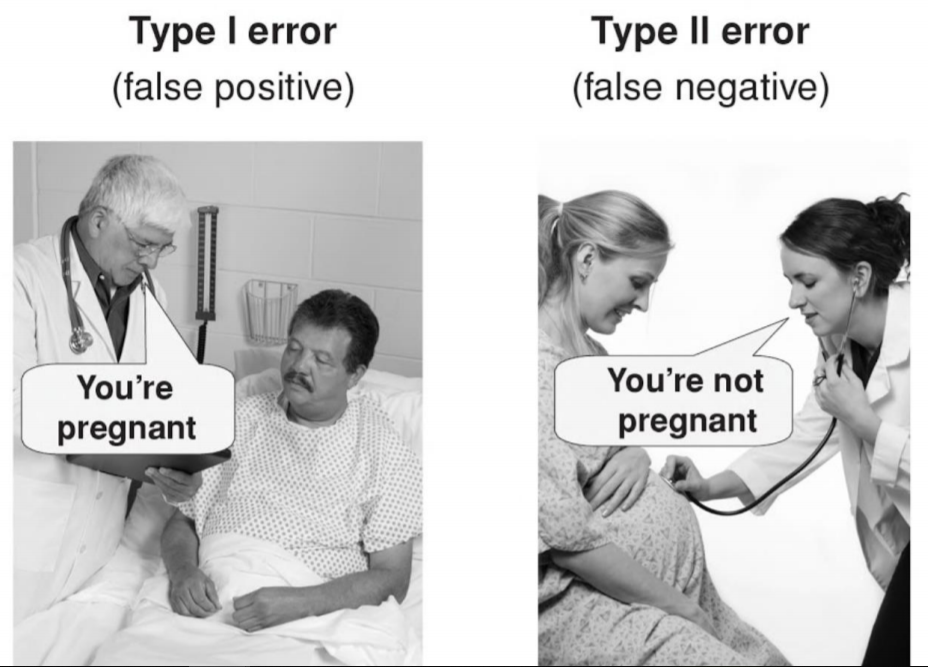

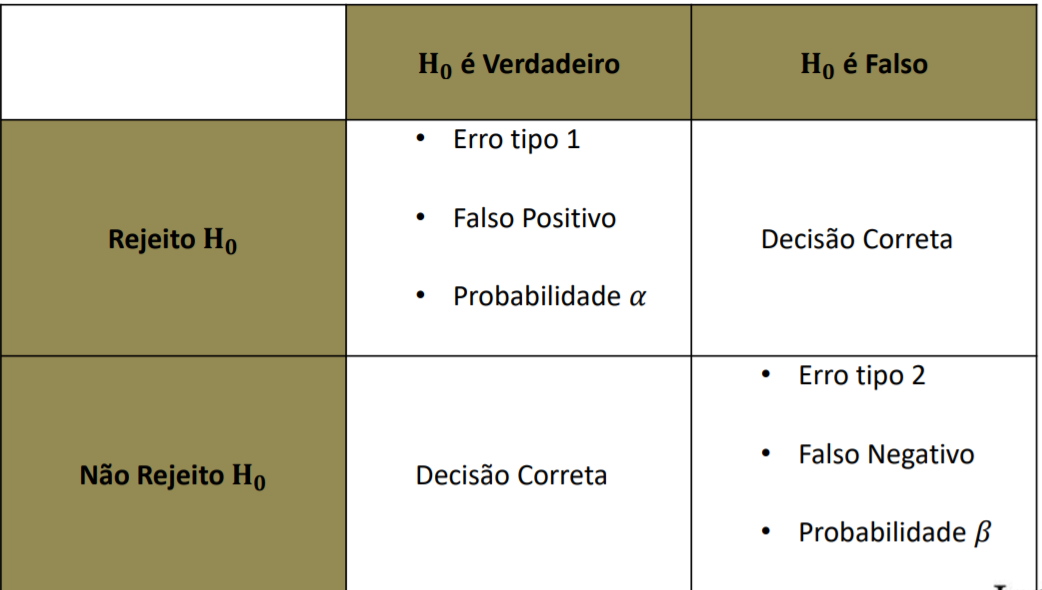

## Teste de hipotese
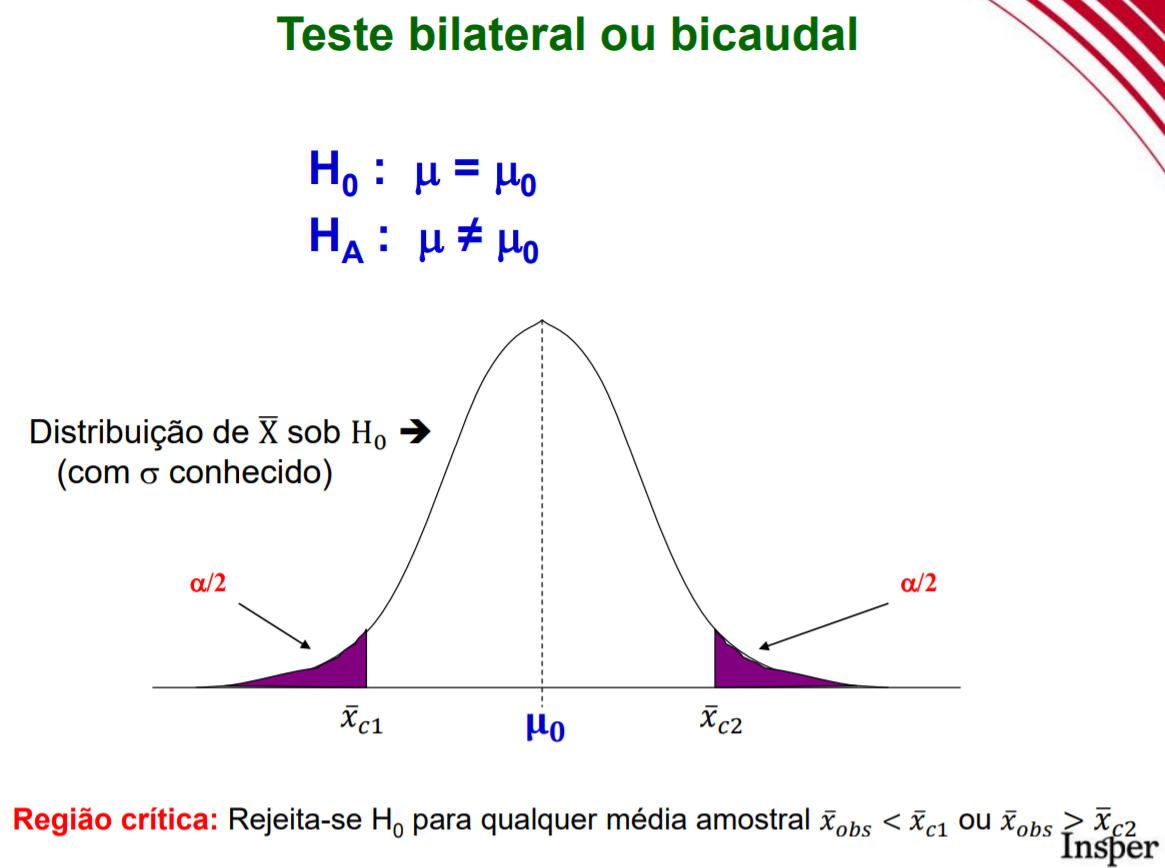